In [1]:
%run ./HC_NS_model.ipynb

In [2]:
### Visuotactile experiment simulation setup

# Distance points in cm (network coordinates)
v_distances = np.asarray([13.2, 23.1, 33, 42.9, 52.8])
mydistances = np.linspace(v_distances[0], v_distances[-1], 15)

## Simulation setup
simtime = 100  # ms
bi = 0
g = 0.6

## Synapses setup
B_0 = 1.5
L_ex, L_in, S_ex, S_in = 0.15, 0.05, 1, 4

In [4]:
mydistances = np.linspace(v_distances[0], v_distances[-1], 15)
g = 0.6
Lt, Lv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 1, 4)
corrRTs, ZMs, ZTs, ZAs = experimentrun(
    mydistances, simtime, bi, g, L_ex, L_in, S_ex, S_in, B_0
)

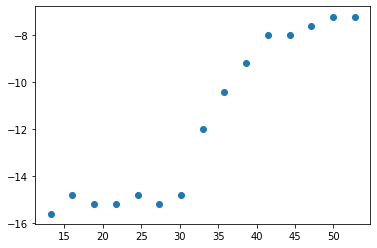

In [7]:
plt.figure(1)
plt.scatter(mydistances, corrRTs)

In [ ]:
mydistances = np.linspace(v_distances[0], v_distances[-1], 20, endpoint=True)
sizeg = 9
mygrange = np.linspace(0.1, 1, sizeg, endpoint=True)
mylexrange = np.asarray([0.15, 0.63258857])
sizelex = mylexrange.size

cps11 = np.zeros((sizeg, sizelex))
slopes11 = np.zeros((sizeg, sizelex))
rts11 = np.zeros((sizeg, mydistances.size, sizelex))
zts11 = np.zeros((sizeg, Mt, Nt, mydistances.size + 1, sizelex))
zvs11 = np.zeros((sizeg, Mv, Nv, mydistances.size + 1, sizelex))
zms11 = np.zeros((sizeg, int(simtime / 0.4) + 1, mydistances.size + 1, sizelex))

for i in range(sizeg):
    for j in range(sizelex):
        L_ex = mylexrange[j]
        g = mygrange[i]
        (
            rts11[i, :, j],
            zms11[i, :, :, j],
            zts11[i, :, :, :, j],
            zvs11[i, :, :, :, j],
        ) = experimentrun(mydistances, simtime, bi, g, L_ex, L_in, S_ex, S_in, B_0)

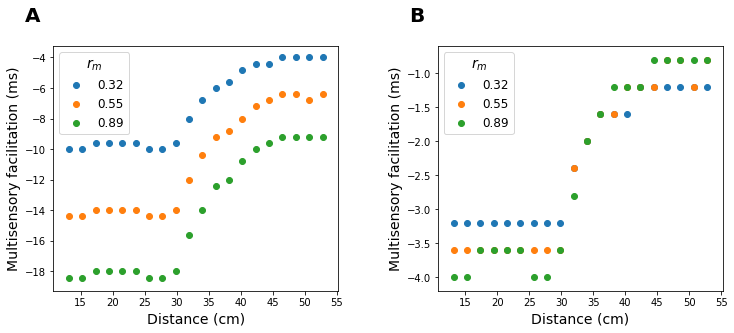

In [75]:
idx = [2, 4, 7]

fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

ax1 = plt.subplot(122)
for i in idx:
    ax1.scatter(mydistances, rts11[i, :, 1], label=np.round(mygrange[i], 2))
ax1.set_xlabel("Distance (cm)", size=14)
ax1.set_ylabel("Multisensory facilitation (ms)", size=14)
leg = plt.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(121)
for i in idx:
    ax2.scatter(mydistances, rts11[i, :, 0], label=np.round(mygrange[i], 2))
ax2.set_xlabel("Distance (cm)", size=14)
ax2.set_ylabel("Multisensory facilitation (ms)", size=14)
leg = plt.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)
fig.subplots_adjust(wspace=0.35)
np.save("Results/gainlexinteraction.npy", rts11)

# Appendix

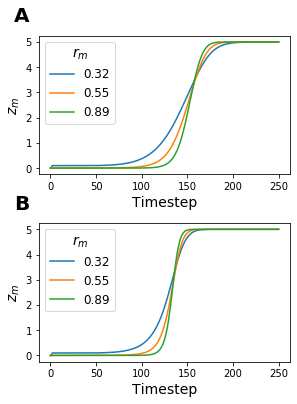

In [65]:
idx = [2, 4, 7]

fig, axs = plt.subplots(2, 1, figsize=(4.5, 6))

ax1 = plt.subplot(212)
for i in idx:
    plt.plot(zms11[i, :, 12, 1], label=np.round(mygrange[i], 2))
ax1.set_xlabel("Timestep", size=14)
ax1.set_ylabel("$z_m$", size=14)
leg = plt.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(211)
for i in idx:
    plt.plot(zms11[i, :, 12, 0], label=np.round(mygrange[i], 2))
ax2.set_xlabel("Timestep", size=14)
ax2.set_ylabel("$z_m$", size=14)
leg = plt.legend(title="$r_m$", fontsize=12, title_fontsize=14)
ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)
fig.subplots_adjust(hspace=0.35)